# Get and explore dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
risk = pd.read_excel("./data/cancer patient data sets.xlsx")

In [3]:
risk.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [34]:
risk.shape

(1000, 24)

In [5]:
risk.columns

Index(['Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [6]:
risk["Level"].value_counts()

High      365
Medium    332
Low       303
Name: Level, dtype: int64

In [7]:
risk["Gender"].value_counts()

1    598
2    402
Name: Gender, dtype: int64

In [8]:
risk["Passive Smoker"].value_counts()

2    284
7    187
4    161
3    140
8    108
1     60
6     30
5     30
Name: Passive Smoker, dtype: int64

In [9]:
risk.drop(columns="Patient Id", inplace=True)

In [10]:
risk.dtypes

Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object

In [11]:
risk_summ = risk.describe()

In [12]:
for i in risk_summ:
    print(risk_summ[i])
    print("\n")

count    1000.000000
mean       37.174000
std        12.005493
min        14.000000
25%        27.750000
50%        36.000000
75%        45.000000
max        73.000000
Name: Age, dtype: float64


count    1000.000000
mean        1.402000
std         0.490547
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: Gender, dtype: float64


count    1000.0000
mean        3.8400
std         2.0304
min         1.0000
25%         2.0000
50%         3.0000
75%         6.0000
max         8.0000
Name: Air Pollution, dtype: float64


count    1000.000000
mean        4.563000
std         2.620477
min         1.000000
25%         2.000000
50%         5.000000
75%         7.000000
max         8.000000
Name: Alcohol use, dtype: float64


count    1000.000000
mean        5.165000
std         1.980833
min         1.000000
25%         4.000000
50%         6.000000
75%         7.000000
max         8.000000
Name: Dust Allergy, dtype: float64


count 

In [13]:
risk.isna().sum()

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [133]:
risk_selection = risk[["Obesity", "Wheezing", "Passive Smoker", "Coughing of Blood", "Alcohol use", "Fatigue", "Balanced Diet", "Dust Allergy", "Smoking", "Swallowing Difficulty"]]

In [23]:
risk_selection = risk[["Obesity","Smoking", "Alcohol use"]]

In [24]:
risk_selection

,Obesity,Smoking,Alcohol use
0,4,3,4
1,2,2,1
2,7,2,5
3,7,7,7
4,7,8,8
...,...,...,...
995,7,7,7
996,7,7,8
997,7,2,5
998,7,8,8


In [26]:
X = risk_selection
y = risk["Level"]

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # initiate transformer
X_train = scaler.fit_transform(X_train) # scale data
X_test = scaler.transform(X_test) # scale test set

In [29]:
X_train.shape

(800, 3)

In [30]:
X_test.shape

(200, 3)

# Models

In [21]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


In [35]:
start_time = time.time()
forest = RandomForestClassifier()

forest.fit(X_train, y_train)

# Check accuracy in the testset
y_predict = forest.predict(X_train)
print("Train acc: " + str(accuracy_score(y_train, y_predict)))

# Check accuracy in the testset
y_test_predict = forest.predict(X_test)
print("Test acc: " + str(round(accuracy_score(y_test, y_test_predict),2)))

print("\n")
print("Train confussion matrix")
print(confusion_matrix(y_train, y_predict))

print("\n")
print("Test confussion matrix")
print(confusion_matrix(y_test, y_test_predict))

print("\n")
print(pd.DataFrame(classification_report(y_test, y_test_predict, output_dict=True)))

print("\n")
print("--- %s seconds ---" % (time.time() - start_time))

Train acc: 0.99125
Test acc: 0.98


Train confussion matrix
[[289   0   0]
 [  0 241   7]
 [  0   0 263]]


Test confussion matrix
[[76  0  0]
 [ 0 52  3]
 [ 0  0 69]]


           High        Low     Medium  accuracy   macro avg  weighted avg
precision   1.0   1.000000   0.958333     0.985    0.986111      0.985625
recall      1.0   0.945455   1.000000     0.985    0.981818      0.985000
f1-score    1.0   0.971963   0.978723     0.985    0.983562      0.984949
support    76.0  55.000000  69.000000     0.985  200.000000    200.000000


--- 0.6511518955230713 seconds ---


In [41]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_test_predict)
mat_df = pd.DataFrame(mat)
mat_df = mat_df.rename({0:"Low", 1: "Medium", 2:"High"})
mat_df = mat_df.rename(columns={0: "Low", 1: "Medium", 2:"High"})
mat_df["total"] = mat_df["Low"] + mat_df["Medium"] + mat_df["High"]
mat_df = mat_df.append(mat_df.sum(axis=0).rename('total'))
mat_df.index.names = ['Real']
columns=[('Predicted', 'Low'), ('Predicted', 'Medium'), ('Predicted', 'High'), ('Predicted', 'total')]
mat_df.columns = pd.MultiIndex.from_tuples(columns)
mat_df

Predicted                  
             Low Medium High total
Real                              
Low           76      0    0    76
Medium         0     52    3    55
High           0      0   69    69
total         76     52   72   200

In [45]:
precision =pd.DataFrame(classification_report(y_test, y_test_predict, output_dict=True)).iloc[0:1,0:3]

In [46]:
precision = precision["Low"],precision["Medium"],precision["High"]

In [51]:
precision = pd.DataFrame(precision).transpose()

In [55]:
precision

,Low,Medium,High
precision,1.0,0.958333,1.0


In [56]:
mat_df.append(precision,ignore_index=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/multi.py:3369: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  uniq_tuples = lib.fast_unique_multiple([self._values, other._values], sort=sort)


AttributeError: 'NoneType' object has no attribute 'is_extension'

Feature ranking:
1. feature 0 (0.407224)
2. feature 2 (0.324012)
3. feature 1 (0.268764)


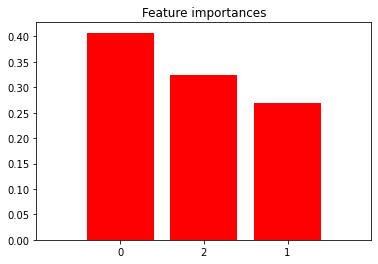

In [32]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [33]:
X.columns

Index(['Obesity', 'Smoking', 'Alcohol use'], dtype='object')

In [ ]:
import tensorflow